In [1]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



%load_ext autoreload
%autoreload 2

# Load generated graphs

In [2]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    data_in = cs.load_data("../Generated_graphs/ETNgen-"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_dym_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/Dymond/"+file_name+"_dym.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_tag_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/TagGen/"+file_name+"_generato_TagGen.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_stm_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/STM/"+file_name+"_STM.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

In [3]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

# Compute and store topological results

In [4]:
ORIGINAL_COLOR = "#4C4C4C"
ETN_COLOR = "#5100FF"
STM_COLOR = "#FF6A74"
TAG_COLOR = "#63CA82"
DYM_COLOR = "#FFD579"





ORIGINAL_COLOR = "#020005"
ETN_COLOR = "#F3AA20" 
STM_COLOR = "#2A445E" 
TAG_COLOR = "#841E62"
DYM_COLOR = "#346B6D"

In [19]:
file_name = "High_School11"
orig_graphs = load_origin_graph(file_name,gap=299)

etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
tag_gen = load_tag_graph(file_name)
stm_gen = load_stm_graph(file_name)

In [20]:
min_len = min(len(orig_graphs),len(etn_gen),len(dym_gen),len(stm_gen),len(tag_gen))

orig_graphs = orig_graphs[:min_len]
etn_gen = etn_gen[:min_len]
dym_gen = dym_gen[:min_len]
stm_gen = stm_gen[:min_len]
tag_gen = tag_gen[:min_len]

In [21]:
print("ETNgen")
res_etn = compute_all_metrics(orig_graphs,etn_gen)
print("Dym")
res_dym = compute_all_metrics(orig_graphs,dym_gen)
print("STM")
res_stm = compute_all_metrics(orig_graphs,stm_gen)
print("TAG")
res_tag = compute_all_metrics(orig_graphs,tag_gen)

ETNgen
density 	 0.089 0.001436
global clu	 0.137 0.000000
avg short p	 0.345 0.000000
metric p 	 0.061 0.071199
metric n 	 0.163 0.000027
assortat 	 0.305 0.000000
s metric	 0.139 0.000000
metric f 	 0.089 0.001436
strenght 	 0.087 0.000000
duration 	 0.233 0.000000
Dym
density 	 0.310 0.000000
global clu	 0.062 0.062993
avg short p	 0.365 0.000000
metric p 	 0.342 0.000000
metric n 	 0.265 0.000000
assortat 	 0.463 0.000000
s metric	 0.196 0.000000
metric f 	 0.310 0.000000
strenght 	 0.108 0.000019
duration 	 0.363 0.000000
STM
density 	 0.510 0.000000
global clu	 0.085 0.002886
avg short p	 0.373 0.000000
metric p 	 0.523 0.000000
metric n 	 0.276 0.000000
assortat 	 0.684 0.000000
s metric	 0.523 0.000000
metric f 	 0.523 0.000000
strenght 	 0.488 0.000000
duration 	 0.379 0.000000
TAG
density 	 0.393 0.000000
global clu	 0.264 0.000000
avg short p	 0.759 0.000000
metric p 	 0.388 0.000000
metric n 	 0.888 0.000000
assortat 	 0.771 0.000000
s metric	 0.405 0.000000
metric f 	 0.39

In [22]:
np.save("topology_results/etngen/topology_res_"+file_name+".npy",res_etn)
np.save("topology_results/dymgen/topology_res_"+file_name+".npy",res_dym)
np.save("topology_results/stmgen/topology_res_"+file_name+".npy",res_stm)
np.save("topology_results/taggen/topology_res_"+file_name+".npy",res_tag)

# load topology results

In [6]:
def load_topo_res(file_name):
    res_etn = np.load("topology_results/etngen/topology_res_"+file_name+".npy")[:,0]
    res_dym = np.load("topology_results/dymgen/topology_res_"+file_name+".npy")[:,0]
    res_stm = np.load("topology_results/stmgen/topology_res_"+file_name+".npy")[:,0]
    res_tag = np.load("topology_results/taggen/topology_res_"+file_name+".npy")[:,0]
    return res_etn,res_stm,res_tag,res_dym

def load_topo_res_pvalue(file_name):
    res_etn = np.load("topology_results/etngen/topology_res_"+file_name+".npy")[:,1]
    res_dym = np.load("topology_results/dymgen/topology_res_"+file_name+".npy")[:,1]
    res_stm = np.load("topology_results/stmgen/topology_res_"+file_name+".npy")[:,1]
    res_tag = np.load("topology_results/taggen/topology_res_"+file_name+".npy")[:,1]
    return res_etn,res_stm,res_tag,res_dym

In [72]:
e,d,s,t = load_topo_res_pvalue("High_School11")
ee,dd,ss,tt = load_topo_res("High_School11")

In [73]:
labels = ["Density   ",
          "clust coef",
          "ASPL      ",
          "nb ind    ",
          "New conv  ",
          "Assor     ",
          "S-met     ",          
          "F inter   ",
          "Edge str  ",
          "Dura      "]

In [74]:
for i in range(len(e)):
    print(labels[i])#,";\t","{:.3f};".format(ee[i]),"{:.10f}".format(e[i]))

Density   
clust coef
ASPL      
nb ind    
New conv  
Assor     
S-met     
F inter   
Edge str  
Dura      


In [82]:
for i in range(len(e)):
    print( "{:.10f}".format(ee[i]))

0.0893054024
0.1367144432
0.3452673453
0.0606394708
0.1626863105
0.3054722921
0.1389195149
0.0893054024
0.0871872593
0.2327159155


In [62]:
s

array([1.63407574e-126, 6.85159426e-081, 0.00000000e+000, 1.47418053e-106,
       0.00000000e+000, 1.13444383e-148, 1.40283853e-137, 1.63407574e-126,
       1.44328993e-015, 1.44328993e-015])

In [6]:


ORIGINAL_COLOR = "#020005"
ETN_COLOR = "#F3AA20" 
STM_COLOR = "#2A445E" 
TAG_COLOR = "#841E62"
DYM_COLOR = "#346B6D"

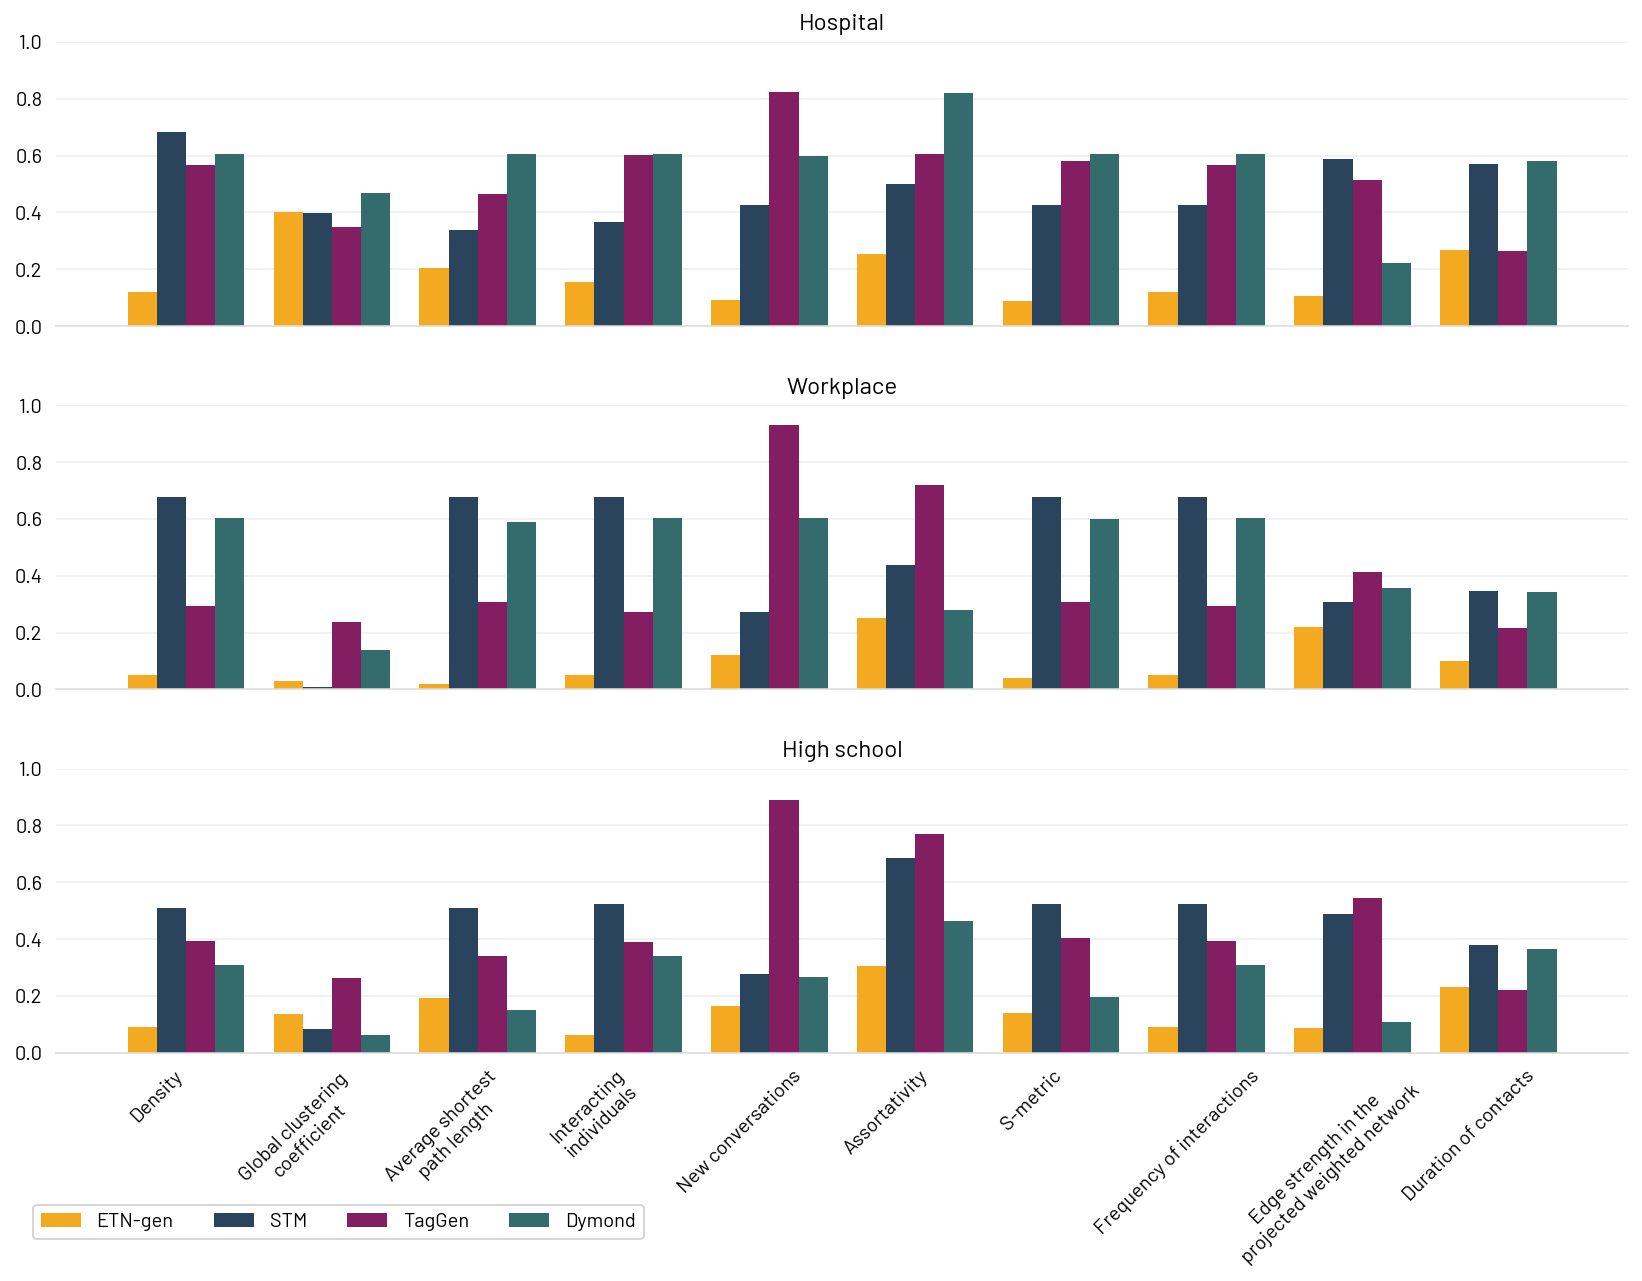

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


x1,x2,x3,x4 = load_topo_res("LH10")
labels = ["Density",
          "Global clustering \ncoefficient",
          "Average shortest\npath length",
          "Interacting\nindividuals",
          "New conversations",
          "Assortativity",
          "S-metric",          
          "Frequency of interactions",
          "Edge strength in the\nprojected weighted network",
          "Duration of contacts"]#,"sim1"]#,"sim2"]
x = np.arange(len(x1))  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(3,1,figsize=(12,9))


ax[0].title.set_text("Hospital")
rects1 = ax[0].bar(x - width/2, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[0].bar(x + width/2, x2, width, label='STM',color=STM_COLOR)
rects3 = ax[0].bar(x + 0.3, x3, width, label='TagGen',color=TAG_COLOR)
rects4 = ax[0].bar(x + 0.3+0.2, x4, width, label='Dymond',color=DYM_COLOR)



x1,x2,x3,x4 = load_topo_res("InVS13")
ax[1].title.set_text("Workplace")
rects1 = ax[1].bar(x - width/2, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[1].bar(x + width/2, x2, width, label='STM',color=STM_COLOR)
rects3 = ax[1].bar(x + 0.3, x3, width, label='TagGen',color=TAG_COLOR)
rects4 = ax[1].bar(x + 0.3+0.2, x4, width, label='Dymond',color=DYM_COLOR)


x1,x2,x3,x4 = load_topo_res("High_School11")
ax[2].title.set_text("High school")
rects1 = ax[2].bar(x - width/2, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[2].bar(x + width/2, x2, width, label='STM',color=STM_COLOR)
rects3 = ax[2].bar(x + 0.3, x3, width, label='TagGen',color=TAG_COLOR)
rects4 = ax[2].bar(x + 0.3+0.2, x4, width, label='Dymond',color=DYM_COLOR)

ax[0].set_xticks(x)
ax[0].set_xticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=45)
ax[0].set_ylim(0,1)
ax[1].set_xticks(x)
ax[1].set_xticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=45)
ax[1].set_ylim(0,1)
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels,rotation=45)
ax[2].set_ylim(0,1)
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[0].tick_params(bottom=False, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].yaxis.grid(True, color='#EEEEEE')
ax[0].xaxis.grid(False)

ax[1].tick_params(bottom=False, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].yaxis.grid(True, color='#EEEEEE')
ax[1].xaxis.grid(False)

ax[2].tick_params(bottom=False, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].yaxis.grid(True, color='#EEEEEE')
ax[2].xaxis.grid(False)


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_color('#DDDDDD')



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_color('#DDDDDD')



ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_color('#DDDDDD')

ax[2].legend(loc='upper right',ncol = 5,bbox_to_anchor=(0.38, -0.5))

fig.tight_layout()
plt.savefig("topology_main.pdf", bbox_inches = 'tight')
plt.show()

<ipython-input-8-29f36ba7f8c7>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(labels,rotation=0)


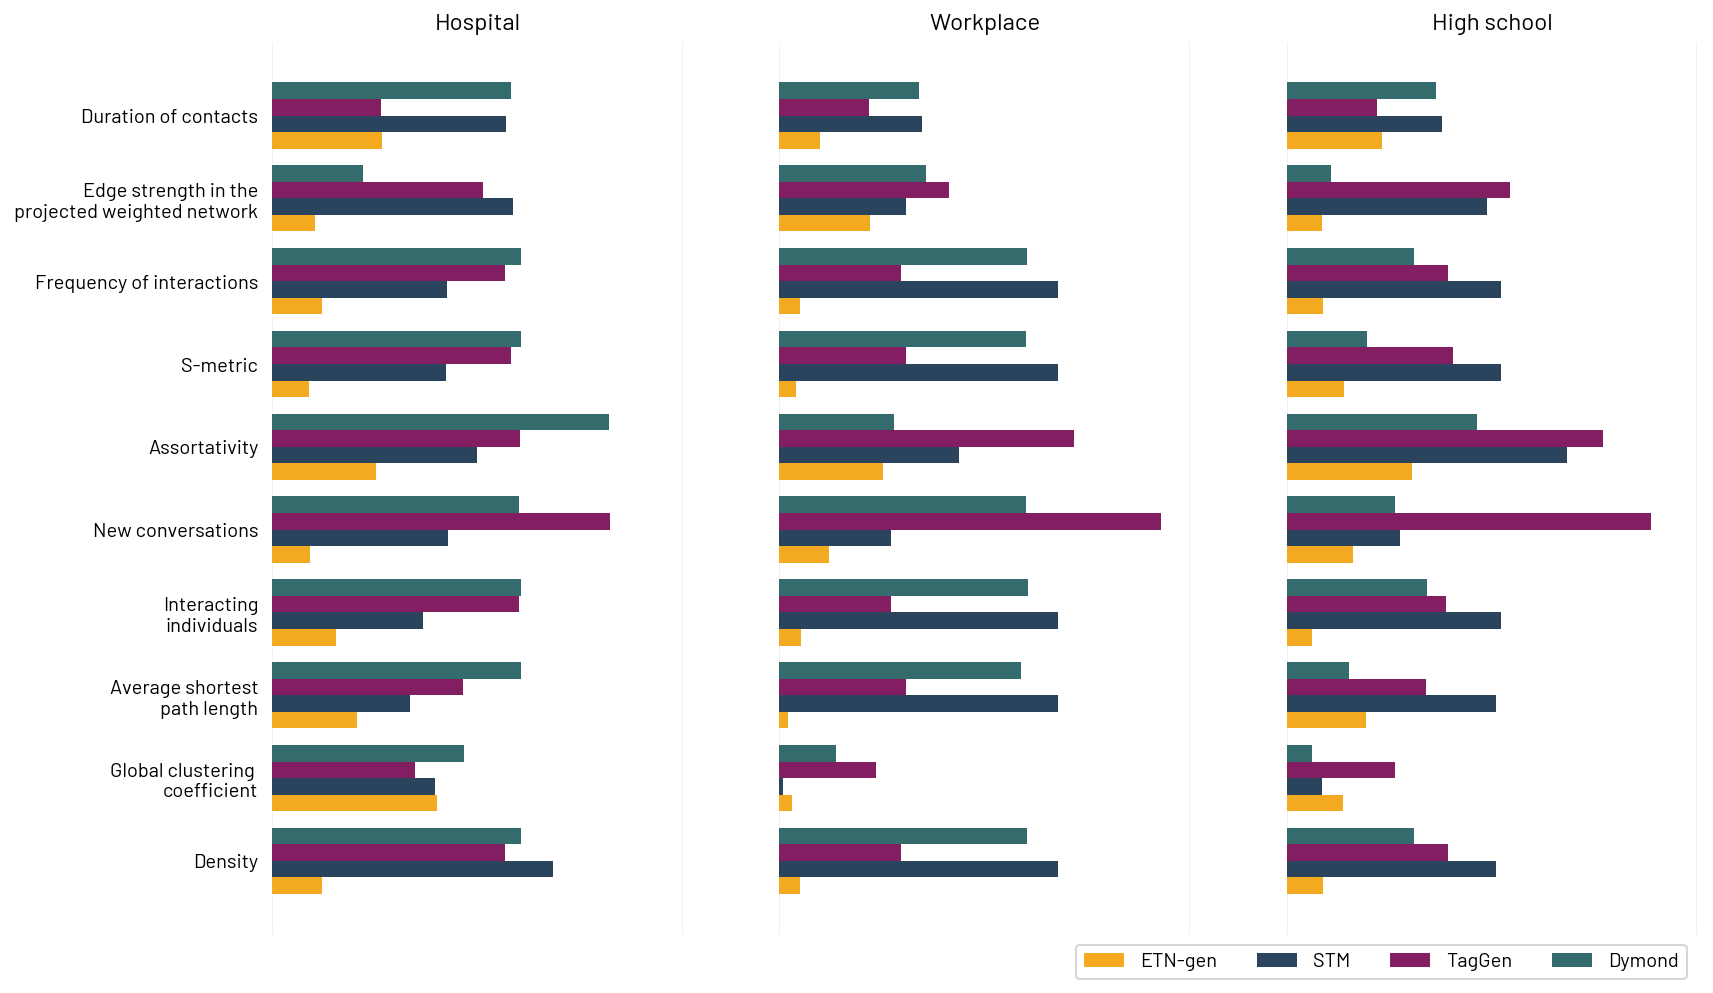

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


x1,x2,x3,x4 = load_topo_res("LH10")
labels = ["Density",
          "Global clustering \ncoefficient",
          "Average shortest\npath length",
          "Interacting\nindividuals",
          "New conversations",
          "Assortativity",
          "S-metric",          
          "Frequency of interactions",
          "Edge strength in the\nprojected weighted network",
          "Duration of contacts"]#,"sim1"]#,"sim2"]
x = np.arange(len(x1))  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(1,3,figsize=(12,7))
fig.tight_layout(pad=-1)

ax[0].title.set_text("Hospital")
rects1 = ax[0].barh(x - 0.3, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[0].barh(x -0.1, x2, width, label='STM',color=STM_COLOR)
rects3 = ax[0].barh(x + 0.1, x3, width, label='TagGen',color=TAG_COLOR)
rects4 = ax[0].barh(x + 0.3, x4, width, label='Dymond',color=DYM_COLOR)




x1,x2,x3,x4 = load_topo_res("InVS13")
ax[1].title.set_text("Workplace")
rects1 = ax[1].barh(x - 0.3, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[1].barh(x - 0.1, x2, width, label='STM',color=STM_COLOR)
rects3 = ax[1].barh(x + 0.1, x3, width, label='TagGen',color=TAG_COLOR)
rects4 = ax[1].barh(x + 0.3, x4, width, label='Dymond',color=DYM_COLOR)


x1,x2,x3,x4 = load_topo_res("High_School11")
ax[2].title.set_text("High school")
rects1 = ax[2].barh(x - 0.3, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[2].barh(x - 0.1, x2, width, label='STM',color=STM_COLOR)
rects3 = ax[2].barh(x + 0.1, x3, width, label='TagGen',color=TAG_COLOR)
rects4 = ax[2].barh(x + 0.3, x4, width, label='Dymond',color=DYM_COLOR)




ax[0].set_yticklabels(labels,rotation=0)
ax[0].set_yticks(x)
#ax[0].set_xlim(0,1)

ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)
#ax[1].set_xlim(0,1)

ax[2].set_yticks(x)
#ax[2].set_xlim(0,1)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)

ax[2].set_xticks([0,1])
ax[2].set_xticklabels([" "," "])
ax[1].set_xticks([0,1])
ax[1].set_xticklabels([" "," "])
ax[0].set_xticks([0,1])
ax[0].set_xticklabels([" "," "])


ax[0].tick_params(bottom=False, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#EEEEEE')
ax[0].yaxis.grid(False)


ax[1].tick_params(bottom=False, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#EEEEEE')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=False, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#EEEEEE')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)

ax[2].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, 0))

fig.tight_layout()
plt.savefig("topology_main_test_1.pdf", bbox_inches = 'tight')
plt.show()